In [39]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
import os

%matplotlib inline

In [84]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Data Sets')

In [20]:
data  = pd.read_csv('AdvWorksCusts.csv')
spend = pd.read_csv('AW_AveMonthSpend.csv')

In [21]:
data['AveMonthSpend'] = spend['AveMonthSpend']

In [22]:
data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend'],
      dtype='object')

In [23]:
data = data.drop('Title', axis=1)

In [24]:
data = data.drop('MiddleName', axis=1)

In [25]:
data = data.drop('Suffix', axis=1)

In [26]:
data = data.drop('AddressLine2', axis=1)

In [27]:
data.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [28]:
data.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
dtype: int64

In [30]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Occupation', 'MaritalStatus']

Features = encode_string(data['Gender'])
for col in categorical_columns:
    temp = encode_string(data[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 

(16519, 14)
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]]


C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case yo

In [31]:
Features = np.concatenate([Features, np.array(data[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
                                                   'YearlyIncome']])], axis = 1)
print(Features.shape)
print(Features[:2, :])   

(16519, 18)
[[0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.37947e+05]
 [0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 3.00000e+00 1.01141e+05]]


In [32]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(data['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [33]:
scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] = scaler.transform(x_train[:,14:])
x_test[:,14:] = scaler.transform(x_test[:,14:])
print(x_train.shape)
x_train[:5,14:]

(16219, 18)


array([[ 0.69650586, -1.31657686, -0.65515964, -0.04749099],
       [ 0.69650586, -1.31657686,  0.66665081, -0.07727738],
       [ 0.69650586, -0.43822714, -0.65515964,  1.2623045 ],
       [ 0.69650586, -1.31657686, -0.65515964, -0.36454107],
       [-1.4357381 ,  1.31847231,  0.00574558,  0.85921884]])

In [34]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [35]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[-1.06595202e+13 -1.06595202e+13 -1.19797657e+12 -1.19797657e+12
 -1.19797657e+12 -1.19797657e+12 -1.19797657e+12  2.34650318e+12
  2.34650318e+12  2.34650318e+12  2.34650318e+12  2.34650318e+12
  9.51099355e+12  9.51099355e+12 -6.49270731e-02 -4.94395451e-01
  1.68437404e+01  8.83119651e+00]


In [36]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 40.8266193816842
Root Mean Square Error = 6.38957114223515
Mean Absolute Error    = 4.968910145947906
Median Absolute Error  = 3.9482421875
R^2                    = 0.9474766762830663
Adjusted R^2           = 0.9422629640023413


C:\Users\Sam Cannon\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


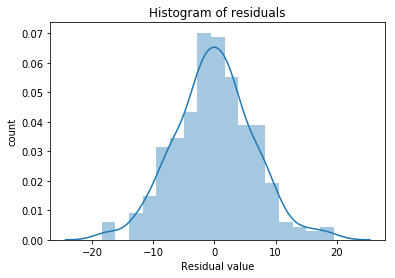

In [37]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

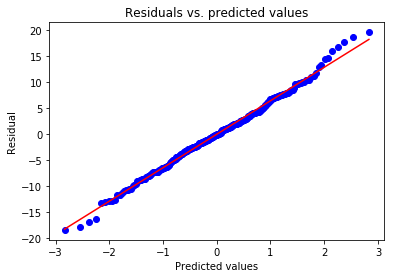

In [40]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score) 

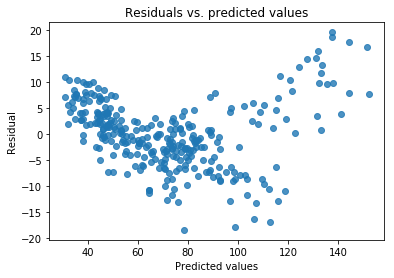

In [41]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [51]:
test2 = pd.read_csv('AW_test.csv')

In [52]:
test2.isnull().sum()

CustomerID                0
Title                   496
FirstName                 0
MiddleName              216
LastName                  0
Suffix                  499
AddressLine1              0
AddressLine2            487
City                      0
StateProvinceName         0
CountryRegionName         0
PostalCode                0
PhoneNumber               0
BirthDate                 0
Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
YearlyIncome              0
dtype: int64

In [54]:
test2 = test2.drop('Title', axis=1)

In [55]:
test2 = test2.drop('MiddleName', axis=1)

In [56]:
test2=test2.drop('Suffix', axis=1)

In [57]:
test2=test2.drop('AddressLine2', axis=1)

In [58]:
test2.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

In [71]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Occupation', 'MaritalStatus']

Features = encode_string(test2['Gender'])
for col in categorical_columns:
    temp = encode_string(test2[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 

(500, 14)
[[1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]]


C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case yo

In [72]:
Features = np.concatenate([Features, np.array(test2[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
                                                   'YearlyIncome']])], axis = 1)
print(Features.shape)
print(Features[:2, :])   

(500, 18)
[[1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 2.00000e+00 0.00000e+00 8.69310e+04]
 [0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 1.00125e+05]]


In [73]:
scaler = preprocessing.StandardScaler().fit(Features[:,14:])
Features[:,14:] = scaler.transform(Features[:,14:])

In [74]:
Features.shape

(500, 18)

In [76]:
predicted_values = lin_mod.predict(Features)

In [77]:
predicted_values.shape

(500,)

In [79]:
predicted_valuesdf = pd.DataFrame(data=predicted_values)

In [80]:
predicted_valuesdf.reset_index()

,index,0
0,0,41.091064
1,1,103.312744
2,2,48.516602
3,3,86.936279
4,4,58.021330
5,5,41.889648
6,6,92.575195
7,7,123.046875
8,8,99.183594
9,9,53.593018


In [81]:
cid = pd.DataFrame(data=test2['CustomerID'])
cid.reset_index()

,index,CustomerID
0,0,18988
1,1,29135
2,2,12156
3,3,13749
4,4,27780
5,5,16375
6,6,16109
7,7,15606
8,8,20888
9,9,20716


In [82]:
predicted_values_with_cid = pd.merge(cid, predicted_valuesdf, left_index=True, right_index=True)

In [83]:
predicted_values_with_cid

,CustomerID,0
0,18988,41.091064
1,29135,103.312744
2,12156,48.516602
3,13749,86.936279
4,27780,58.021330
5,16375,41.889648
6,16109,92.575195
7,15606,123.046875
8,20888,99.183594
9,20716,53.593018


In [86]:
predicted_values_with_cid.to_csv('predictions_with_cid.csv')